# Setup and imports

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Fall2021/CSE_519_Project'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Fall2021/CSE_519_Project'
/content


In [ ]:
!pip install statsmodels

In [3]:
# Main imports
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Forecasting model imports
from fbprophet import Prophet
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [4]:
sns.set_theme( style="white", palette="pastel" )

In [6]:
## To load up drive

%cd drive/MyDrive/CSE_519_assignment/CSE_519_Project/

/content/drive/MyDrive/CSE_519_assignment/CSE_519_Project


# Forecasting

In [7]:
cdc_final = pd.read_csv("vaccine_final_data.csv")

In [8]:
cdc_final.head()

,Unnamed: 0,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,PCTPOVALL_2019,Population 2020,"Percent of adults with a bachelor's degree or higher, 2015-19",Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,per_gop,per_dem
0,0,2021-11-30,6077,48,San Joaquin County,CA,55.7,424244,423613.0,67.4,390835,70.1,92419,92.6,97.4,583702.0,76.6,576818.0,91.8,532157.0,95.4,127504.0,99.9,D,16.0,16.0,16.0,16.0,Metro,4.0,4.0,4.0,4.0,13.6,779233.0,18.762234,294454.0,37374.0,11.3,68458.0,0.0712,0.1143,0.0354,0.4140,0.0023,0.1520,0.0674,0.0055,0.3185,0.419833,0.558644
1,1,2021-11-30,26013,48,Baraga County,MI,56.6,4650,4649.0,63.3,4533,66.6,1502,80.4,97.6,5110.0,62.2,5109.0,69.5,5004.0,73.5,1647.0,88.2,C,12.0,12.0,12.0,12.0,Non-metro,8.0,8.0,8.0,8.0,13.7,8158.0,15.812240,2793.0,370.0,11.7,48371.0,0.0950,0.1690,0.0584,0.0159,0.0979,0.0040,0.0930,0.0006,0.7263,0.622090,0.366023
2,2,2021-11-30,16071,48,Oneida County,ID,38.0,1722,NaN,NaN,1716,52.8,705,76.1,97.6,1954.0,43.1,NaN,NaN,1933.0,59.5,748.0,80.8,B,6.0,7.0,8.0,8.0,Non-metro,6.0,7.0,8.0,8.0,11.3,4564.0,17.105263,2244.0,98.0,4.2,55833.0,0.2022,0.2727,0.1315,0.0449,0.0016,0.0000,0.0011,0.0000,0.9341,0.876377,0.101591
3,3,2021-11-30,38001,48,Adams County,ND,45.8,1014,1014.0,52.4,985,55.1,468,74.1,92.2,1164.0,52.5,1150.0,59.5,1116.0,62.4,525.0,83.1,A,3.0,4.0,4.0,4.0,Non-metro,7.0,8.0,8.0,8.0,10.7,2200.0,25.578562,961.0,38.0,3.8,55880.0,0.1447,0.1975,0.0988,0.0169,0.0104,0.0251,0.0208,0.0000,0.9230,0.773050,0.203310
4,4,2021-11-30,20071,48,Greeley County,KS,48.5,598,598.0,59.5,571,63.5,199,81.9,93.6,637.0,51.7,637.0,63.4,608.0,67.6,209.0,86.0,C,11.0,12.0,12.0,12.0,Non-metro,7.0,8.0,8.0,8.0,10.9,1284.0,27.160494,810.0,15.0,1.8,58492.0,0.1504,0.2037,0.0919,0.2473,0.0059,0.0000,0.0000,0.0000,0.7451,0.853736,0.122417


In [9]:
cdc_final['Date'] = pd.to_datetime( cdc_final['Date'] )

In [10]:
cdc_final_US = cdc_final.groupby(['FIPS','Recip_County','Date']).agg({'Series_Complete_Pop_Pct' : 'mean'}).reset_index()

In [11]:
cdc_final_US

,FIPS,Recip_County,Date,Series_Complete_Pop_Pct
0,1001,Autauga County,2020-12-13,0.0
1,1001,Autauga County,2020-12-14,0.0
2,1001,Autauga County,2020-12-15,0.0
3,1001,Autauga County,2020-12-16,0.0
4,1001,Autauga County,2020-12-17,0.0
...,...,...,...,...
1138067,78030,St. Thomas Island,2021-11-26,0.0
1138068,78030,St. Thomas Island,2021-11-27,0.0
1138069,78030,St. Thomas Island,2021-11-28,0.0
1138070,78030,St. Thomas Island,2021-11-29,0.0


In [17]:
cdc_final_county = cdc_final_US[ cdc_final_US['Recip_County'] == 'Los Angeles County' ]

In [24]:
cdc_final_county_fips = []
def predictAndPlotForCounty( countyName, days=1000, plot=False ):
    cdc_final_county = cdc_final_US[ cdc_final_US['Recip_County'] == countyName ]
    cdc_final_county_fips.append(cdc_final_county['FIPS'].iloc[0])
    cdc_final_county_train = cdc_final_county[ cdc_final_US['Date'] < '2021-10-1' ]
    model = Prophet( interval_width=0.95 )
    cdc_final_county_train = cdc_final_county_train.rename( {'Date' : 'ds', 'Series_Complete_Pop_Pct' : 'y'}, axis='columns' )
    model.fit( cdc_final_county_train )
    future_DS = model.make_future_dataframe( periods=days, freq='D' )
    forecast = model.predict( future_DS )
    if not plot:
        if len( forecast[ forecast['trend'] > 80.0 ]['ds'].values ) > 0:
          return str( forecast[ forecast['trend'] > 80.0 ]['ds'].values[0] )
        else:
          return None
    else:
        # Plot the predicted and actual vaccination percentages
        plt.figure( figsize=(6, 4) )
        plt.plot( cdc_final_county['Date'],cdc_final_county['Series_Complete_Pop_Pct'], label="Actual" )
        plt.plot( forecast['ds'], forecast['yhat'], label="Predicted" )
        plt.xlabel( 'Date' )
        plt.ylabel( 'Percent of population vaccinated' )
        plt.title( 'Actual vs Predicted vaccination for %s' % ( countyName ) )
        plt.show()
        '''# Plot forecast plot
        model.plot(forecast)'''

In [25]:
topCountiesToPredict = ['Los Angeles County', 'Maricopa County', 'Miami-Dade County', 'San Diego County', 'Queens County', 'Santa Clara County', 'Harris County', 'Riverside County', 'Broward County', 'Bexar County']
bottomCountiesToPredcit = ['Borden County', 'Kenedy County', 'Hayes County', 'Banner County', 'Billings County', 'Loup County', 'Nantucket County', 'Petroleum County', 'Arthur County', 'Slope County']

In [26]:
countyTo80Percent = []
for topCounty in topCountiesToPredict:
    temp = {}
    temp[ '80Percent' ] = predictAndPlotForCounty( topCounty )
    temp[ 'County' ] = topCounty
    countyTo80Percent.append( temp )

print( countyTo80Percent )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet wi

[{'80Percent': '2022-04-17T00:00:00.000000000', 'County': 'Los Angeles County'}, {'80Percent': '2022-08-27T00:00:00.000000000', 'County': 'Maricopa County'}, {'80Percent': '2021-11-07T00:00:00.000000000', 'County': 'Miami-Dade County'}, {'80Percent': '2022-08-02T00:00:00.000000000', 'County': 'San Diego County'}, {'80Percent': '2021-11-30T00:00:00.000000000', 'County': 'Queens County'}, {'80Percent': '2021-12-14T00:00:00.000000000', 'County': 'Santa Clara County'}, {'80Percent': None, 'County': 'Harris County'}, {'80Percent': '2022-07-01T00:00:00.000000000', 'County': 'Riverside County'}, {'80Percent': '2022-01-23T00:00:00.000000000', 'County': 'Broward County'}, {'80Percent': None, 'County': 'Bexar County'}]


In [27]:
cdc_final_county_fips

[6037, 4013, 12086, 6073, 36081, 6085, 13145, 6065, 12011, 48029]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


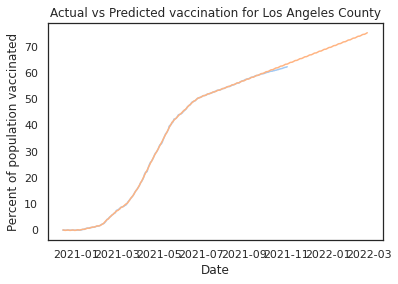

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


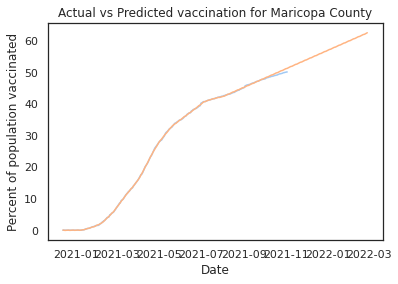

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


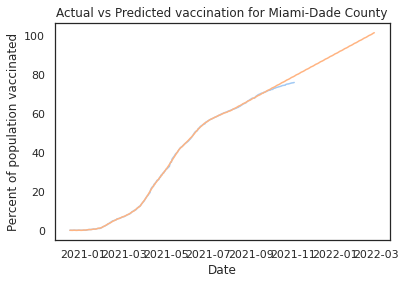

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


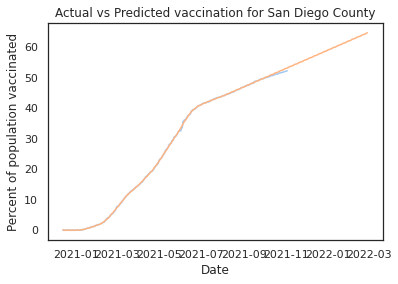

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


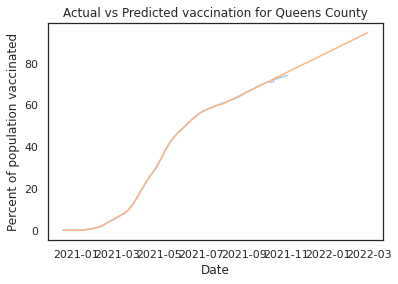

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


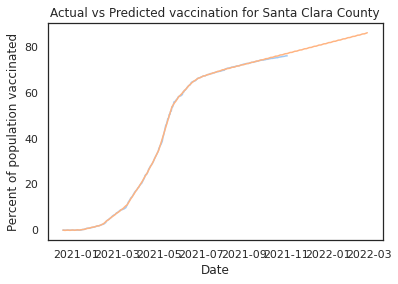

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


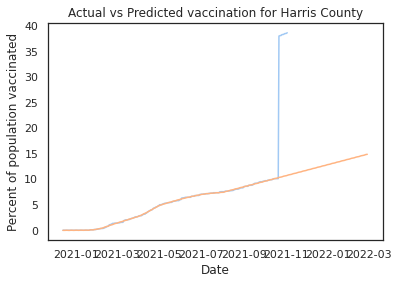

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


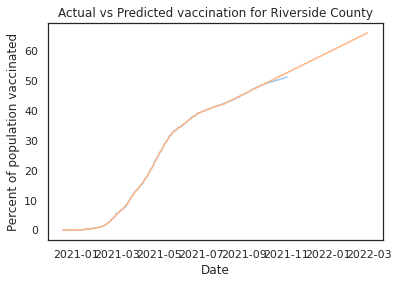

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


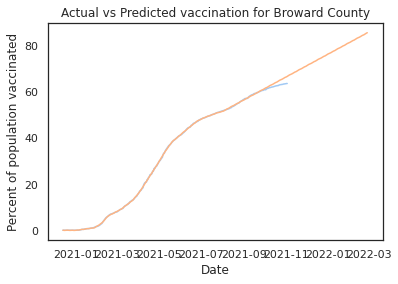

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


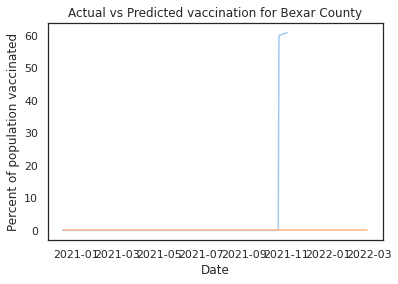

In [ ]:
for topCounty in topCountiesToPredict:
    predictAndPlotForCounty( topCounty, days=150, plot=True )

# Vaccination vs Infection rates

In [ ]:
cdc_final_cases = pd.read_csv( "cases_final_data.csv" )

In [ ]:
cdc_final_US[ cdc_final_US['FIPS'] == 6037 ]

,FIPS,Recip_County,Date,Series_Complete_Pop_Pct
72012,6037,Los Angeles County,2020-12-13,0.0
72013,6037,Los Angeles County,2020-12-14,0.0
72014,6037,Los Angeles County,2020-12-15,0.0
72015,6037,Los Angeles County,2020-12-16,0.0
72016,6037,Los Angeles County,2020-12-17,0.0
...,...,...,...,...
72360,6037,Los Angeles County,2021-11-26,63.7
72361,6037,Los Angeles County,2021-11-27,63.7
72362,6037,Los Angeles County,2021-11-28,63.7
72363,6037,Los Angeles County,2021-11-29,64.0


In [ ]:
cdc_final_cases[ cdc_final_cases['fips'] == 6037.0 ]

,date,county,state,fips,cases,deaths
9,2020-01-26,Los Angeles,California,6037.0,1,0.0
14,2020-01-27,Los Angeles,California,6037.0,1,0.0
19,2020-01-28,Los Angeles,California,6037.0,1,0.0
24,2020-01-29,Los Angeles,California,6037.0,1,0.0
29,2020-01-30,Los Angeles,California,6037.0,1,0.0
...,...,...,...,...,...,...
1950051,2021-11-25,Los Angeles,California,6037.0,1523244,27074.0
1953302,2021-11-26,Los Angeles,California,6037.0,1524998,27102.0
1956553,2021-11-27,Los Angeles,California,6037.0,1525616,27121.0
1959804,2021-11-28,Los Angeles,California,6037.0,1526190,27128.0


In [ ]:
cdc_final_cases.dropna( inplace=True )

In [ ]:
cdc_final_cases[ 'fips' ] = cdc_final_cases[ 'fips' ].astype( int )

In [ ]:
cdc_final_cases[ cdc_final_cases[ 'fips' ] == 6037 ]

,date,county,state,fips,cases,deaths
9,2020-01-26,Los Angeles,California,6037,1,0.0
14,2020-01-27,Los Angeles,California,6037,1,0.0
19,2020-01-28,Los Angeles,California,6037,1,0.0
24,2020-01-29,Los Angeles,California,6037,1,0.0
29,2020-01-30,Los Angeles,California,6037,1,0.0
...,...,...,...,...,...,...
1950051,2021-11-25,Los Angeles,California,6037,1523244,27074.0
1953302,2021-11-26,Los Angeles,California,6037,1524998,27102.0
1956553,2021-11-27,Los Angeles,California,6037,1525616,27121.0
1959804,2021-11-28,Los Angeles,California,6037,1526190,27128.0


In [ ]:
def plotVacVsCasesForCounty( countyFips, cases=False, deaths=False ):
    county_vac = cdc_final_US[ cdc_final_US[ 'FIPS' ] == countyFips ]
    county_cases = cdc_final_cases[ cdc_final_cases[ 'fips' ] == countyFips ]
    county_cases[ 'Date' ] = county_cases[ 'date' ]
    county_cases['Date'] = pd.to_datetime( county_cases['Date'] )
    countyVacVsCases = county_vac.merge( county_cases, how='left', on='Date' )
    countyVacVsCases.dropna()
    print( countyVacVsCases )
    if not cases and not deaths:
        sns.lineplot( data=countyVacVsCases, x="Date", y="Series_Complete_Pop_Pct" )
    elif cases:
        sns.lineplot( data=countyVacVsCases, x="Date", y="cases" )
    else:
        sns.lineplot( data=countyVacVsCases, x="Date", y="deaths" )
    plt.title( str( countyFips ) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



     FIPS        Recip_County       Date  ...    fips      cases   deaths
0    6037  Los Angeles County 2020-12-13  ...  6037.0   525651.0   8298.0
1    6037  Los Angeles County 2020-12-14  ...  6037.0   532895.0   8345.0
2    6037  Los Angeles County 2020-12-15  ...  6037.0   543949.0   8431.0
3    6037  Los Angeles County 2020-12-16  ...  6037.0   566185.0   8568.0
4    6037  Los Angeles County 2020-12-17  ...  6037.0   580505.0   8664.0
..    ...                 ...        ...  ...     ...        ...      ...
348  6037  Los Angeles County 2021-11-26  ...  6037.0  1524998.0  27102.0
349  6037  Los Angeles County 2021-11-27  ...  6037.0  1525616.0  27121.0
350  6037  Los Angeles County 2021-11-28  ...  6037.0  1526190.0  27128.0
351  6037  Los Angeles County 2021-11-29  ...  6037.0  1526976.0  27138.0
352  6037  Los Angeles County 2021-11-30  ...     NaN        NaN      NaN

[353 rows x 10 columns]


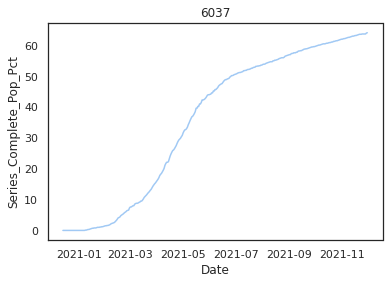

In [ ]:
plotVacVsCasesForCounty( 6037 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



     FIPS        Recip_County       Date  ...    fips      cases   deaths
0    6037  Los Angeles County 2020-12-13  ...  6037.0   525651.0   8298.0
1    6037  Los Angeles County 2020-12-14  ...  6037.0   532895.0   8345.0
2    6037  Los Angeles County 2020-12-15  ...  6037.0   543949.0   8431.0
3    6037  Los Angeles County 2020-12-16  ...  6037.0   566185.0   8568.0
4    6037  Los Angeles County 2020-12-17  ...  6037.0   580505.0   8664.0
..    ...                 ...        ...  ...     ...        ...      ...
348  6037  Los Angeles County 2021-11-26  ...  6037.0  1524998.0  27102.0
349  6037  Los Angeles County 2021-11-27  ...  6037.0  1525616.0  27121.0
350  6037  Los Angeles County 2021-11-28  ...  6037.0  1526190.0  27128.0
351  6037  Los Angeles County 2021-11-29  ...  6037.0  1526976.0  27138.0
352  6037  Los Angeles County 2021-11-30  ...     NaN        NaN      NaN

[353 rows x 10 columns]


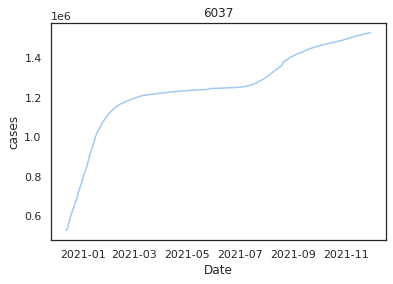

In [ ]:
plotVacVsCasesForCounty( 6037, cases=True )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



     FIPS        Recip_County       Date  ...    fips      cases   deaths
0    6037  Los Angeles County 2020-12-13  ...  6037.0   525651.0   8298.0
1    6037  Los Angeles County 2020-12-14  ...  6037.0   532895.0   8345.0
2    6037  Los Angeles County 2020-12-15  ...  6037.0   543949.0   8431.0
3    6037  Los Angeles County 2020-12-16  ...  6037.0   566185.0   8568.0
4    6037  Los Angeles County 2020-12-17  ...  6037.0   580505.0   8664.0
..    ...                 ...        ...  ...     ...        ...      ...
348  6037  Los Angeles County 2021-11-26  ...  6037.0  1524998.0  27102.0
349  6037  Los Angeles County 2021-11-27  ...  6037.0  1525616.0  27121.0
350  6037  Los Angeles County 2021-11-28  ...  6037.0  1526190.0  27128.0
351  6037  Los Angeles County 2021-11-29  ...  6037.0  1526976.0  27138.0
352  6037  Los Angeles County 2021-11-30  ...     NaN        NaN      NaN

[353 rows x 10 columns]


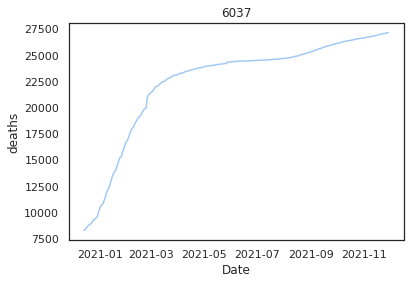

In [ ]:
plotVacVsCasesForCounty( 6037, deaths=True )